In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Source

%matplotlib inline

## Model schematic

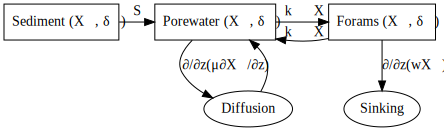

In [2]:
src = Source(
    """digraph G {
    P [shape=box, label=<Porewater (X&#x209a;, &delta;&#x209a;)>];
    F [shape=box, label=<Forams (X&#x2099;, &delta;&#x2099;)>];
    S [shape=box, label=<Sediment (X&#x209b;, &delta;&#x209b;)>];
    D [label="Diffusion"]; W [label="Sinking"];
    {rank=same; P; F; S}; {rank=same; D; W};
    S->P [label="S"]; D->P;
    P->F [label=<k&#x209a;&#x2099;X&#x2099;>];
    F->P [label=<k&#x2099;&#x209a;X&#x2099;>];
    P->D [label=<&#x2202;/&#x2202;z(&mu;&#x2202;X&#x209a;/&#x2202;z)>];
    F->W [label=<&#x2202;/&#x2202;z(wX&#x2099;)>];
    }"""
)
src

$$\require{cancel}$$
## Model equations
Set the time rate of change equal to the sum of fluxes

$$\frac{\partial X_p}{\partial t} = S + k_{np}X_n - k_{pn}X_n + \frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg) \tag{Eq. 1a}$$

$$\frac{\partial X_n}{\partial t} = k_{pn}X_n - k_{np}X_n + \frac{\partial}{\partial z}\bigg(wX_n\bigg) \tag{Eq. 1b}$$

$$\frac{\partial \delta_p}{\partial t} = \bigg[\bigg(\delta_s - \delta_p\bigg)S + \bigg(\delta_n - \delta_p\bigg)k_{np}X_n + \mu\frac{\partial X_p}{\partial z}\frac{\partial \delta_p}{\partial z}\bigg]\frac{1}{X_p} \tag{Eq. 1c}$$

$$\frac{\partial \delta_n}{\partial t} = \bigg(\delta_p - \delta_n\bigg)k_{pn} + w\frac{\partial\delta_n}{\partial z} \tag{Eq. 1d}$$

## Porewater fraction equation (Eq. 1c)
Multiply all concentrations and fluxes in Eq. 1a by their corresponding isotopic fraction

$$\frac{\partial}{\partial t}\bigg(\delta_pX_p\bigg) = \delta_sS + \delta_nk_{np}X_n - \delta_pk_{pn}X_n + \frac{\partial}{\partial z}\bigg(\delta_p\mu\frac{\partial X_p}{\partial z}\bigg) \tag{Eq. 2}$$

Solve the LHS of Eq. 2 for $\partial \delta_p/\partial t$ using the Product Rule

$$\frac{\partial \delta_p}{\partial t} = \bigg[\frac{\partial}{\partial t}\bigg(\delta_pX_p\bigg) - \delta_p\frac{\partial X_p}{\partial t}\bigg]\frac{1}{X_p} \tag{Eq. 3}$$

Substitute the RHS of Eqs. 1a and 2 into $\partial X_p/\partial t$ and $\partial \delta_pX_p/\partial t$ in Eq. 3

$$\frac{\partial \delta_p}{\partial t} = \bigg[\underbrace{\delta_sS + \delta_nk_{np}X_n - \cancel{\delta_pk_{pn}X_n} + \frac{\partial}{\partial z}\bigg(\delta_p\mu\frac{\partial X_p}{\partial z}\bigg)}_{\text{Eq. 2}} - \delta_p\bigg(\underbrace{S + k_{np}X_n - \cancel{k_{pn}X_n} + \frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}_{\text{Eq. 1a}}\bigg)\bigg]\frac{1}{X_p} \tag{Eq. 4}$$

Expand the diffusion term from Eq. 2 using the Product Rule

$$\frac{\partial \delta_p}{\partial t} = \bigg[\bigg(\delta_s - \delta_p\bigg)S + \bigg(\delta_n - \delta_p\bigg)k_{np}X_n + \underbrace{\mu\frac{\partial X_p}{\partial z}\frac{\partial \delta_p}{\partial z} + \cancel{\delta_p\frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}}_{\text{expanded diffusion from Eq. 2}} - \cancel{\delta_p\frac{\partial}{\partial z}\bigg(\mu\frac{\partial X_p}{\partial z}\bigg)}\bigg]\frac{1}{X_p} \tag{Eq. 5}$$

So the expression for porewater fraction becomes Eq. 1c

## Foram fraction equation (Eq. 1d)
Multiply all concentrations and fluxes in Eq. 1b by their corresponding isotopic fraction

$$\frac{\partial}{\partial t}\bigg(\delta_nX_n\bigg) = \delta_pk_{pn}X_n - \delta_nk_{np}X_n + \frac{\partial}{\partial z}\bigg(\delta_nwX_n\bigg) \tag{Eq. 6}$$

Solve the LHS of Eq. 6 for $\partial \delta_n/\partial t$ using the Product Rule

$$\frac{\partial \delta_n}{\partial t} = \bigg[\frac{\partial}{\partial t}\bigg(\delta_nX_n\bigg) - \delta_n\frac{\partial X_n}{\partial t}\bigg]\frac{1}{X_n} \tag{Eq. 7}$$

Substitute the RHS of Eqs. 1b and 6 into $\partial X_n/\partial t$ and $\partial \delta_nX_n/\partial t$ in Eq. 7

$$\frac{\partial \delta_n}{\partial t} = \bigg[\underbrace{\delta_pk_{pn}X_n - \cancel{\delta_nk_{np}X_n} + \frac{\partial}{\partial z}\bigg(\delta_nwX_n\bigg)}_{\text{Eq. 6}} - \delta_n\bigg(\underbrace{k_{pn}X_n - \cancel{k_{np}X_n} + \frac{\partial}{\partial z}\bigg(wX_n\bigg)}_{\text{Eq. 1b}}\bigg)\bigg]\frac{1}{X_n} \tag{Eq. 8}$$

Expand the sinking term in Eq. 6 using the Product Rule

$$\frac{\partial \delta_n}{\partial t} = \bigg[\bigg(\delta_p - \delta_n\bigg)k_{pn}\cancel{X_n} + \underbrace{\cancel{\delta_n\frac{\partial}{\partial z}\bigg(wX_n\bigg)} + w\cancel{X_n}\frac{\partial\delta_n}{\partial z}}_{\text{expanded sinking from Eq. 6}} - \cancel{\delta_n\frac{\partial}{\partial z}\bigg(wX_n\bigg)}\bigg]\frac{1}{\cancel{X_n}} \tag{Eq. 9}$$

So the expression for foram fraction becomes Eq. 1d

## Steady-state solutions
Let $\partial X/\partial t = 0$, $\partial\mu/\partial z = 0$, $\partial w/\partial z = 0$, $k_{pn} - k_{np} = \kappa$ and $\kappa = \kappa(z)$. From Eqs. 1a and 1b

$$\frac{\partial^2X_p}{\partial z^2} = \frac{1}{\mu}\bigg(\kappa X_n - S\bigg) \tag{Eq. 10a}$$

$$\frac{\partial X_n}{\partial z} = - \frac{\kappa}{w} X_n \tag{Eq. 10b}$$

Solve 10b as a separable, nonlinear ODE

$$\int\frac{1}{X_n}dX_n = \ln X_n = -\frac{1}{w}\int\kappa dz \tag{Eq. 11a}$$

$$X_n = \exp\bigg[-\frac{1}{w}\int\kappa dz\bigg] \tag{Eq. 11b}$$

If $\kappa = Be^{\beta z}$, and $X_n = X_{sw}$ at $z = 0$ then

$$X_n = X_{sw}\exp\bigg[\frac{B}{\beta w}\bigg(1 - e^{\beta z}\bigg)\bigg] \tag{Eq. 11c}$$

Sub Eq. 11c for $X_n$ in Eq. 10a

$$\frac{\partial^2 X_p}{\partial z^2} = \frac{1}{\mu}\bigg(X_{sw}B\exp\bigg[\beta z + \frac{B}{\beta w}\bigg(1 - e^{\beta z}\bigg)\bigg] - Ae^{\alpha z}\bigg) \tag{Eq. 12}$$

Integrate once and $\partial X_p/\partial z \to 0$ as $z \to -\infty$

$$\frac{\partial X_p}{\partial z} = \frac{1}{\mu}\bigg(\frac{X_{sw}B}{\beta - \frac{B}{w}e^{\beta z}}\exp\bigg[\beta z + \frac{B}{\beta w}\bigg(1 - e^{\beta z}\bigg)\bigg] - \frac{A}{\alpha}e^{\alpha z}\bigg) \tag{Eq. 13}$$

Surface boundary condition

$$\frac{\partial^2 X_p}{\partial z^2} = \int_{-\infty}^{0}Sdz = A\int_{-\infty}^{0}e^{\alpha z}dz = \frac{A}{\alpha} \text{ at } z = 0  \tag{Eq. 15}$$

Substitute surface BC into Eq. 14 to find $C_0$

$$C_0 = \ln\bigg[\frac{A}{B}\bigg(\frac{\mu}{\alpha} + 1\bigg)\bigg] - \frac{B}{\beta w} \tag{Eq. 16}$$

And sub $C_0$ back into 14

$$\frac{\partial^2 X_p}{\partial z^2} = \frac{1}{\mu}\bigg(B\exp\bigg[\beta z - \frac{B}{\beta w}\bigg(e^{\beta z} + \ln\bigg[\frac{A}{B}\bigg(\frac{\mu}{\alpha} + 1\bigg)\bigg] - 1\bigg)\bigg] - Ae^{\alpha z}\bigg) \tag{Eq. 17}$$

Solve 13 by integration

$$X_p = \frac{1}{\mu}\int\int\bigg(\kappa\exp\bigg[-\frac{1}{w}\int\kappa dz\bigg] - S\bigg)dzdz \tag{Eq. 14}$$

Let $S = Ae^{\alpha z}$ and $\kappa = Be^{\beta z}$ and solve for $\partial X_p/\partial z$

$$\frac{\partial X_p}{\partial z} = \frac{1}{\mu}\bigg(\frac{\beta}{B} - \frac{1}{w}e^{\beta z}\bigg)^{-1}\exp\bigg[\beta z - \frac{B}{\beta w}e^{\beta z} + C_0\bigg] - \frac{A}{\mu\alpha}e^{\alpha z} + C_1\bigg) \tag{Eq. 15}$$

Lower boundary condition: $\partial X_p/\partial z \to 0$ as $z \to -\infty$

$$\cancel{\frac{\partial X_p}{\partial z}} = \frac{1}{\mu}\bigg(\frac{\beta}{B} - \cancel{\frac{1}{w}e^{\beta z}}\bigg)^{-1}\exp\bigg[\beta z - \cancel{\frac{B}{\beta w}e^{\beta z}} + C_0\bigg] - \cancel{\frac{A}{\mu\alpha}e^{\alpha z}} + C_1\bigg) \tag{Eq. 15}$$

$$C_1 = -\frac{B}{\mu\beta}e^{\beta z}e^{C_0} \tag{Eq. 15}$$

### Stability

Consider the diffusion equation

$$\frac{\partial N}{\partial t} = \mu\frac{\partial^2N}{\partial z^2}$$

The forward Euler differencing scheme using the second order centred difference in space is

$$\frac{N^{t+1}_z - N^t_z}{\Delta t} = \mu\frac{N^t_{z-1} - 2N^t_z + N^t_{z+1}}{\Delta z^2}$$

Grouping terms

$$N^{t+1}_z - N^t_z = \frac{\mu\Delta t}{\Delta z^2}\left(N^t_{z-1} - 2N^t_z + N^t_{z+1}\right)$$

Substitute wave solution $N_z^t = N_0e^{i(kz - \omega t)}$ and cancel terms

$$\cancel{N_0e^{i(kz - \omega t)}}\left(e^{-i\omega\Delta t} - 1\right) = \frac{\mu\Delta t}{\Delta z^2}\cancel{N_0e^{i(kz - \omega t)}}\left(e^{-ik\Delta z} - 2 + e^{ik\Delta z}\right)$$

Substitute $2\cos(k\Delta z) = e^{ik\Delta z} + e^{-ik\Delta z}$ and solve for $\omega$

$$-i\omega\Delta t = \ln\left\{\frac{2\mu\Delta t}{\Delta z^2}\big[\cos(k\Delta z) - 1\big] + 1\right\}$$

For stability we must have $\mathcal{Im}\{\omega\} \leq 0$ or

$$\frac{2\mu\Delta t}{\Delta z^2}\big[\cos(k\Delta z) - 1\big] + 1 \leq 1$$

Thus the CFL condition is

$$\frac{2\mu\Delta t}{\Delta z^2} \leq 1$$

### Now consider the diffusion effect on $\epsilon$

$$\frac{\partial\epsilon}{\partial t} = \frac{\mu}{N}\frac{\partial\epsilon}{\partial z}\frac{\partial N}{\partial z}$$

The leapfrog differencing scheme using centred differences is

$$\frac{\epsilon^{t+1}_z - \epsilon^{t-1}_z}{2\Delta t} = \frac{\mu}{N^t_z}\frac{\epsilon^t_{z+1} - \epsilon^t_{z-1}}{2\Delta z}\frac{N^t_{z+1} - N^t_{z-1}}{2\Delta z}$$

Grouping terms

$$\epsilon^{t+1}_z - \epsilon^{t-1}_z = \frac{2\mu\Delta t}{\Delta z^2}\frac{\epsilon^t_{z+1} - \epsilon^t_{z-1}}{2}\frac{N^t_{z+1} - N^t_{z-1}}{2N^t_z}$$

Substitute wave solutions $\epsilon_z^t = \epsilon_0e^{i(kz - \omega t)}$ and $N_z^t = N_0e^{i(kz - \omega t)}$ and cancel terms

$$-\cancel{\epsilon_0e^{i[kz - \omega t]}}\left(e^{i\omega\Delta t} - e^{-i\omega\Delta t}\right) = \frac{\mu\Delta t}{2\Delta z^2}\cancel{\epsilon_0e^{i[kz - \omega t]}}\frac{e^{ik\Delta z} - e^{-ik\Delta z}}{2}\frac{\cancel{N_0e^{i[kz - \omega t]}}\left(e^{ik\Delta z} - e^{-ik\Delta z}\right)}{2\cancel{N_0e^{i[kz - \omega t]}}}$$

Substitute $i\sin(k\Delta z) = \frac{e^{ik\Delta z} - e^{-ik\Delta z}}{2}$

$$e^{i\omega\Delta t} - e^{-i\omega\Delta t} = \frac{2\mu\Delta t}{\Delta z^2}\sin^2(k\Delta z)$$

For stability we must have $\mathcal{Im}\{\omega\} = 0$. Let $e^{-i\omega\Delta t} = \lambda$ such that $\mathcal{Im}\{\omega\}\Delta t = \ln\lambda$. Also, let the RHS equal $q$ for brevity.

$$\lambda^2 + q\lambda - 1 = 0$$

which has roots

$$\lambda = \frac{-q \pm \sqrt{q^2 + 4}}{2} = 1$$

There is no nontrivial solution for $\lambda = 1$, only $q = 0$, thus this scheme is unconditionally unstable.

(0.5, 0)

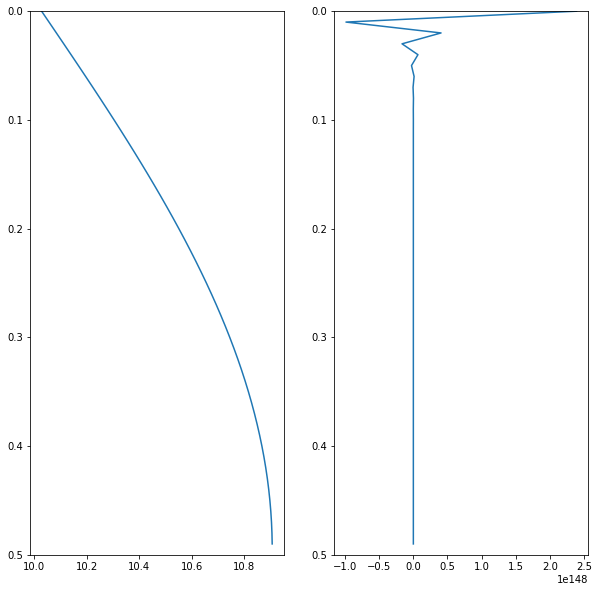

In [91]:
dt = 0.0005  # s
dz = 0.01    # m
mu = 0.1     # m2/s

nsteps = 10000
nlevels = 50

N_0 = 10
eps_0 = 1

N_old = 100 * np.ones(nlevels)
N_new = np.zeros(nlevels)
eps_older = 2 * np.ones(nlevels)
eps_old = 2 * np.ones(nlevels)
eps_new = np.zeros(nlevels)
diff = np.zeros(nlevels)
diff_eps = np.zeros(nlevels)

for t in range(nsteps):
    
    # Calculate diffusion
    diff[0] = mu * (N_0 - 2 * N_old[0] + N_old[1]) / dz**2
    diff[-1] = mu * (N_old[-2] - N_old[-1]) / dz**2
    diff_eps[0] = mu / N_old[0] * (eps_old[0] - eps_0) * (N_old[0] - N_0) / dz**2
    diff_eps[-1] = mu / N_old[-1] * (eps_old[-1] - eps_old[-2]) * (N_old[-1] - N_old[-2]) / dz**2
    for k in range(1, nlevels-1):
        diff[k] = mu * (N_old[k-1] - 2 * N_old[k] + N_old[k+1]) / dz**2
        diff_eps[k] = mu / N_old[k] * (eps_old[k+1] - eps_old[k-1]) * (N_old[k+1] - N_old[k-1]) / (4 * dz**2)
    
    # Calc new
    N_new = diff * dt + N_old
    eps_new = diff_eps * 2 * dt + eps_older
    
    # Update
    eps_older = eps_old
    N_old = N_new
    eps_old = eps_new
    
######################

z = np.arange(0, dz*nlevels, dz)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].plot(N_old, z)
axs[0].set_ylim([0.5, 0])
axs[1].plot(eps_old, z)
axs[1].set_ylim([0.5, 0])

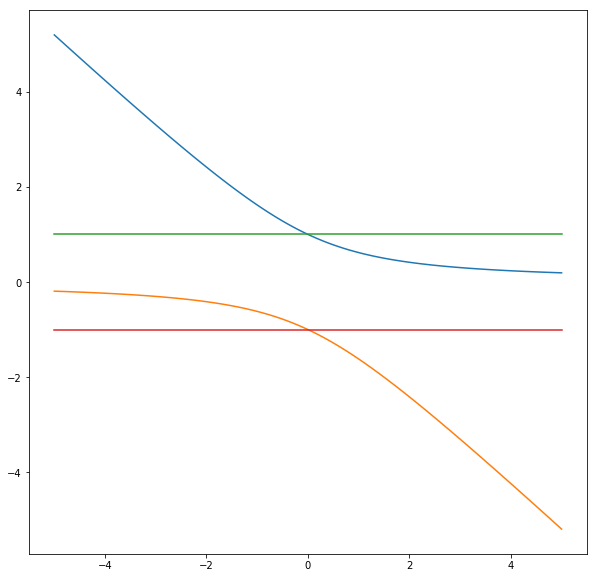

In [76]:
q = np.arange(-5, 5.1, 0.1)
lamda_pos = (-q + np.sqrt(q**2 + 4)) / 2
lamda_neg = (-q - np.sqrt(q**2 + 4)) / 2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(q, lamda_pos)
ax.plot(q, lamda_neg)
ax.plot(q, q*0+1)
ax.plot(q, q*0-1)

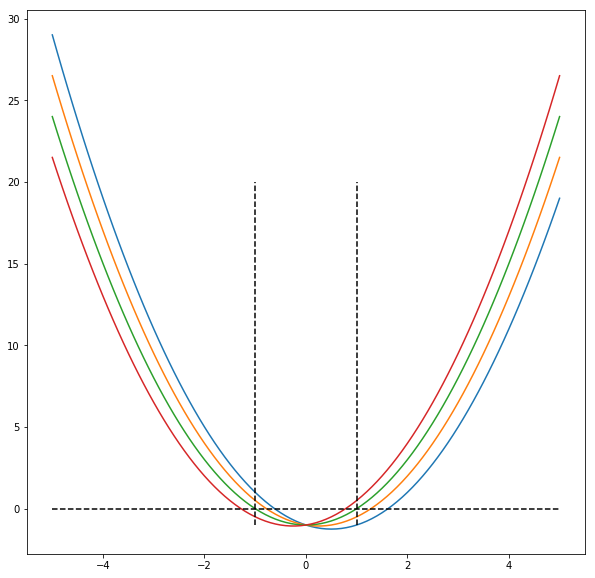

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x = np.arange(-5, 5.1, 0.1)
for q in np.arange(-1, 1, 0.5):
    ax.plot(x, x**2 + q*x - 1)
    
ax.plot([-5, 5], [0, 0], 'k--')
ax.plot([-1, -1], [-1, 20], 'k--')
ax.plot([1, 1], [-1, 20], 'k--')

(11, 101)